In [1]:
# Import libraries as required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 10)

from collections import Counter
from timeit import timeit
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder

#another algo
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#Learning Curve
from sklearn.model_selection import learning_curve

#view
from sklearn.tree import plot_tree

#Test
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

#SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss


### additional
import seaborn as sns
from sklearn import metrics
import timeit
import datetime

# Dataset Cleanup
## load dataset

In [2]:
# Load in the data set as required
data = 'datav4.csv'
df = pd.read_csv(data, sep=";",encoding='ISO-8859-1')
pd.set_option('display.show_dimensions', True)
#df = pd.read_csv(data, sep=":", on_bad_lines='skip')
df = df.drop("Empty", axis=1)
df
#print(df.to_string())

status  poolseq                                     TokenSC  \
0      scam   143290  0xd3ac19255f907186b9186a402ee1978299e366c5   
1      scam   143293  0xad39ff96561527fef2c00bba6f3617ca031f41c1   
2      scam   143295  0x1ba043bf9002094613a7b231afd7945266e71af8   
3      scam   143298  0x2d5e77b3fb848e2cb6b46f82dea28c3cd48d2967   
4      scam   143297  0xbfe22302d5668e0cfd0df1d9046a240f77496557   
...     ...      ...                                         ...   
2978   scam   147034  0xf82ce47f162275dbb56d4ee7f1ec96f926cf4b23   
2979   scam   147033  0xb9b605b51a0dc019ce91eb058be6f01067e2be77   
2980   scam   147032  0x25dfdf1345af0b5b5ee50724a91bcedcf16ad3be   
2981   scam   147035  0xef74aa742cd7d80d14b48a84ece3d196b7e5d495   
2982  legit   146677  0xbccd27062ae1a2bea5731c904b96edfb163aba21   

            Ticker              Name Initial-Liquidity  \
0           SHIBER      Shibereum.ai             01.09   
1           RIPPLE            Ripple       0,041666667   
2     SHIBEREUM.AI      Shibereum AI             02.09   
3            IGROW           AI Grow             01.19   
4             BOWL           DogBowl             01.00   
...            ...               ...               ...   
2978      OSATOSHI   Ordinal Satoshi             02.29   
2979         GODOT             Godot             02.00   
2980       BINGGPT       BingChatGPT       0,052083333   
2981      SURVIVOR  Vampiresurvivor|             03.00   
2982          DOGS           Dogcoin             20.50   

                                      ExchangeSC  \
0     0x1e6f55f0d7e8ac3850a6d07653b142e3893594c2   
1     0xd7c11b2d4de6585e9c39488583b8b68b0ac3497f   
2     0x0c922ca48d2197494419da403fc47f0ce738ca68   
3     0x6203053456fef183494b1e2cf1970f04ee834d33   
4     0x55ff22fff7dc4c6947ab8b86a07a49aa4a5e62ac   
...                                          ...   
2978  0xe7b06f3f58413947df994a834175164b86accb11   
2979  0x591af96156dda18bd6f0c930bb25f050fb513742   
2980  0xd5eb9f953a9a8004cc4d870a2a576582e8c277b3   
2981  0x869a3b4a2ffb0f8608ff1baaf9e93682442b3b31   
2982  0xac6e392beefffe965c35c356d6bc14e493498da8   

                                   CreatorWallet  \
0     0x3b135056d85924a7964b4271d4c3851ae9b8eb5f   
1     0x8668cb758e0f32626ffabc0bc1e29d97d230599b   
2     0x7cf6bf0e995ce0fa9cea851bae637a9351b4586c   
3     0xe02ac04db181533586c387bdaef0a602a6b9b4d0   
4     0x8f1279d1cbe33a2a55d648237e60fc27ccdddb4f   
...                                          ...   
2978  0xf43317d3a2d4d225086167de35ac5d98b38429cf   
2979  0x9e254d8c1addffbeca40344b39ef953d105f8724   
2980  0x08eeb6192dc5ba914b8b0744db2f8ecdd5e6efdb   
2981  0x8f58098791aaf39e4d40c65865dfeb961a17f558   
2982  0x9f2f0f30d7446668d9c1ae94cc29b8f70817a8ae   

                                             CreatorTrx  \
0     0x00bb442e195e334f3b11511805443d5819df9f4484b6...   
1     0x96c9bbac10d0758d696f3d360f39ce0edaec89485487...   
2     0x6a2f0cc73abe36bca722155ba91a55cd35c705cca9d0...   
3     0xda0be5a71fbdb9054f694bf7c3aedce57feb9f2e6e73...   
4     0x5303f8b548f62a2e7191cca14e14d4026146101898b8...   
...                                                 ...   
2978  0x457feda677da979a104934bb70ebef87a78c47b25d4c...   
2979  0x22c98c5332b375f276e54a7a412e076a5f9b74541a30...   
2980  0xdf72c69d469d7dda857cca3e58838cf0bc74f8ee7e2d...   
2981  0x3a7a4f34241f1bf674af034df1960e21daa8432cd512...   
2982  0xeb85652dfdcb0c865736a62b63c7574382164e8e7212...   

                                    First_Wallet  ...    Time  Creator_Nonce  \
0     0x3b135056d85924a7964b4271d4c3851ae9b8eb5f  ...     264              0   
1     0x8668cb758e0f32626ffabc0bc1e29d97d230599b  ...     132              0   
2     0x7cf6bf0e995ce0fa9cea851bae637a9351b4586c  ...   21708              1   
3     0xe02ac04db181533586c387bdaef0a602a6b9b4d0  ...    1008              0   
4     0x8f1279d1cbe33a2a55d648237e60fc27ccdddb4f  ...     360              0   
...                                          ...  ..

## Check the Duplicate data

In [3]:
# Finding duplicate values in Column1
duplicates = df[df.duplicated(['TokenSC'])]

# Printing the duplicate values in Column1
print(duplicates)

Empty DataFrame
Columns: [status, poolseq, TokenSC, Ticker, Name, Initial-Liquidity, ExchangeSC, CreatorWallet, CreatorTrx, First_Wallet, Block_created, Block_Listed, Time, Creator_Nonce, Holders, Honeypot, Buy_Tax, Sell_Tax, Renounce, Twitter, Coingecko, CMC]
Index: []

[0 rows x 22 columns]


## Check renounce column to crosscheck with Creator wallet and some other conditions

In [4]:
df['Renounce2'] = np.where(df['Renounce'].str.lower() == df['CreatorWallet'].str.lower(), 1, 
                            np.where(df['Renounce'] == 'renounce', 2,
                                     np.where(df['Renounce'] == 'error', 3,
                                              np.where(df['Renounce'] == '0x000000000000000000000000000000000000dEaD', 4,
                                                       np.where(df['Renounce'].str.lower() != df['CreatorWallet'].str.lower(), 5,
                                                                np.where(df['Renounce'].str.lower() != '0x0000000000000000000000000000000000000000', 6,0))))))

df

status  poolseq                                     TokenSC  \
0      scam   143290  0xd3ac19255f907186b9186a402ee1978299e366c5   
1      scam   143293  0xad39ff96561527fef2c00bba6f3617ca031f41c1   
2      scam   143295  0x1ba043bf9002094613a7b231afd7945266e71af8   
3      scam   143298  0x2d5e77b3fb848e2cb6b46f82dea28c3cd48d2967   
4      scam   143297  0xbfe22302d5668e0cfd0df1d9046a240f77496557   
...     ...      ...                                         ...   
2978   scam   147034  0xf82ce47f162275dbb56d4ee7f1ec96f926cf4b23   
2979   scam   147033  0xb9b605b51a0dc019ce91eb058be6f01067e2be77   
2980   scam   147032  0x25dfdf1345af0b5b5ee50724a91bcedcf16ad3be   
2981   scam   147035  0xef74aa742cd7d80d14b48a84ece3d196b7e5d495   
2982  legit   146677  0xbccd27062ae1a2bea5731c904b96edfb163aba21   

            Ticker              Name Initial-Liquidity  \
0           SHIBER      Shibereum.ai             01.09   
1           RIPPLE            Ripple       0,041666667   
2     SHIBEREUM.AI      Shibereum AI             02.09   
3            IGROW           AI Grow             01.19   
4             BOWL           DogBowl             01.00   
...            ...               ...               ...   
2978      OSATOSHI   Ordinal Satoshi             02.29   
2979         GODOT             Godot             02.00   
2980       BINGGPT       BingChatGPT       0,052083333   
2981      SURVIVOR  Vampiresurvivor|             03.00   
2982          DOGS           Dogcoin             20.50   

                                      ExchangeSC  \
0     0x1e6f55f0d7e8ac3850a6d07653b142e3893594c2   
1     0xd7c11b2d4de6585e9c39488583b8b68b0ac3497f   
2     0x0c922ca48d2197494419da403fc47f0ce738ca68   
3     0x6203053456fef183494b1e2cf1970f04ee834d33   
4     0x55ff22fff7dc4c6947ab8b86a07a49aa4a5e62ac   
...                                          ...   
2978  0xe7b06f3f58413947df994a834175164b86accb11   
2979  0x591af96156dda18bd6f0c930bb25f050fb513742   
2980  0xd5eb9f953a9a8004cc4d870a2a576582e8c277b3   
2981  0x869a3b4a2ffb0f8608ff1baaf9e93682442b3b31   
2982  0xac6e392beefffe965c35c356d6bc14e493498da8   

                                   CreatorWallet  \
0     0x3b135056d85924a7964b4271d4c3851ae9b8eb5f   
1     0x8668cb758e0f32626ffabc0bc1e29d97d230599b   
2     0x7cf6bf0e995ce0fa9cea851bae637a9351b4586c   
3     0xe02ac04db181533586c387bdaef0a602a6b9b4d0   
4     0x8f1279d1cbe33a2a55d648237e60fc27ccdddb4f   
...                                          ...   
2978  0xf43317d3a2d4d225086167de35ac5d98b38429cf   
2979  0x9e254d8c1addffbeca40344b39ef953d105f8724   
2980  0x08eeb6192dc5ba914b8b0744db2f8ecdd5e6efdb   
2981  0x8f58098791aaf39e4d40c65865dfeb961a17f558   
2982  0x9f2f0f30d7446668d9c1ae94cc29b8f70817a8ae   

                                             CreatorTrx  \
0     0x00bb442e195e334f3b11511805443d5819df9f4484b6...   
1     0x96c9bbac10d0758d696f3d360f39ce0edaec89485487...   
2     0x6a2f0cc73abe36bca722155ba91a55cd35c705cca9d0...   
3     0xda0be5a71fbdb9054f694bf7c3aedce57feb9f2e6e73...   
4     0x5303f8b548f62a2e7191cca14e14d4026146101898b8...   
...                                                 ...   
2978  0x457feda677da979a104934bb70ebef87a78c47b25d4c...   
2979  0x22c98c5332b375f276e54a7a412e076a5f9b74541a30...   
2980  0xdf72c69d469d7dda857cca3e58838cf0bc74f8ee7e2d...   
2981  0x3a7a4f34241f1bf674af034df1960e21daa8432cd512...   
2982  0xeb85652dfdcb0c865736a62b63c7574382164e8e7212...   

                                    First_Wallet  ...  Creator_Nonce  Holders  \
0     0x3b135056d85924a7964b4271d4c3851ae9b8eb5f  ...              0        1   
1     0x8668cb758e0f32626ffabc0bc1e29d97d230599b  ...              0        1   
2     0x7cf6bf0e995ce0fa9cea851bae637a9351b4586c  ...              1        6   
3     0xe02ac04db181533586c387bdaef0a602a6b9b4d0  ...              0       20   
4     0x8f1279d1cbe33a2a55d648237e60fc27ccdddb4f  ...              0        1   
...                                          .

In [5]:
#unique_values_count = df['Renounce2'].nunique()
#print(unique_values_count)

value_counts = df['Renounce2'].value_counts()
print(value_counts)


1    2335
3     369
2     227
4      27
5      25
Name: Renounce2, Length: 5, dtype: int64


## Label Encoder Several columns since the value only either Yes, no, and scam or legit for Status

In [6]:
le = LabelEncoder()
df['Coingecko'] = le.fit_transform(df['Coingecko'])
df['CMC'] = le.fit_transform(df['CMC'])
df['Honeypot'] = le.fit_transform(df['Honeypot'])
df['status'] = le.fit_transform(df['status'])
df

status  poolseq                                     TokenSC  \
0          1   143290  0xd3ac19255f907186b9186a402ee1978299e366c5   
1          1   143293  0xad39ff96561527fef2c00bba6f3617ca031f41c1   
2          1   143295  0x1ba043bf9002094613a7b231afd7945266e71af8   
3          1   143298  0x2d5e77b3fb848e2cb6b46f82dea28c3cd48d2967   
4          1   143297  0xbfe22302d5668e0cfd0df1d9046a240f77496557   
...      ...      ...                                         ...   
2978       1   147034  0xf82ce47f162275dbb56d4ee7f1ec96f926cf4b23   
2979       1   147033  0xb9b605b51a0dc019ce91eb058be6f01067e2be77   
2980       1   147032  0x25dfdf1345af0b5b5ee50724a91bcedcf16ad3be   
2981       1   147035  0xef74aa742cd7d80d14b48a84ece3d196b7e5d495   
2982       0   146677  0xbccd27062ae1a2bea5731c904b96edfb163aba21   

            Ticker              Name Initial-Liquidity  \
0           SHIBER      Shibereum.ai             01.09   
1           RIPPLE            Ripple       0,041666667   
2     SHIBEREUM.AI      Shibereum AI             02.09   
3            IGROW           AI Grow             01.19   
4             BOWL           DogBowl             01.00   
...            ...               ...               ...   
2978      OSATOSHI   Ordinal Satoshi             02.29   
2979         GODOT             Godot             02.00   
2980       BINGGPT       BingChatGPT       0,052083333   
2981      SURVIVOR  Vampiresurvivor|             03.00   
2982          DOGS           Dogcoin             20.50   

                                      ExchangeSC  \
0     0x1e6f55f0d7e8ac3850a6d07653b142e3893594c2   
1     0xd7c11b2d4de6585e9c39488583b8b68b0ac3497f   
2     0x0c922ca48d2197494419da403fc47f0ce738ca68   
3     0x6203053456fef183494b1e2cf1970f04ee834d33   
4     0x55ff22fff7dc4c6947ab8b86a07a49aa4a5e62ac   
...                                          ...   
2978  0xe7b06f3f58413947df994a834175164b86accb11   
2979  0x591af96156dda18bd6f0c930bb25f050fb513742   
2980  0xd5eb9f953a9a8004cc4d870a2a576582e8c277b3   
2981  0x869a3b4a2ffb0f8608ff1baaf9e93682442b3b31   
2982  0xac6e392beefffe965c35c356d6bc14e493498da8   

                                   CreatorWallet  \
0     0x3b135056d85924a7964b4271d4c3851ae9b8eb5f   
1     0x8668cb758e0f32626ffabc0bc1e29d97d230599b   
2     0x7cf6bf0e995ce0fa9cea851bae637a9351b4586c   
3     0xe02ac04db181533586c387bdaef0a602a6b9b4d0   
4     0x8f1279d1cbe33a2a55d648237e60fc27ccdddb4f   
...                                          ...   
2978  0xf43317d3a2d4d225086167de35ac5d98b38429cf   
2979  0x9e254d8c1addffbeca40344b39ef953d105f8724   
2980  0x08eeb6192dc5ba914b8b0744db2f8ecdd5e6efdb   
2981  0x8f58098791aaf39e4d40c65865dfeb961a17f558   
2982  0x9f2f0f30d7446668d9c1ae94cc29b8f70817a8ae   

                                             CreatorTrx  \
0     0x00bb442e195e334f3b11511805443d5819df9f4484b6...   
1     0x96c9bbac10d0758d696f3d360f39ce0edaec89485487...   
2     0x6a2f0cc73abe36bca722155ba91a55cd35c705cca9d0...   
3     0xda0be5a71fbdb9054f694bf7c3aedce57feb9f2e6e73...   
4     0x5303f8b548f62a2e7191cca14e14d4026146101898b8...   
...                                                 ...   
2978  0x457feda677da979a104934bb70ebef87a78c47b25d4c...   
2979  0x22c98c5332b375f276e54a7a412e076a5f9b74541a30...   
2980  0xdf72c69d469d7dda857cca3e58838cf0bc74f8ee7e2d...   
2981  0x3a7a4f34241f1bf674af034df1960e21daa8432cd512...   
2982  0xeb85652dfdcb0c865736a62b63c7574382164e8e7212...   

                                    First_Wallet  ...  Creator_Nonce  Holders  \
0     0x3b135056d85924a7964b4271d4c3851ae9b8eb5f  ...              0        1   
1     0x8668cb758e0f32626ffabc0bc1e29d97d230599b  ...              0        1   
2     0x7cf6bf0e995ce0fa9cea851bae637a9351b4586c  ...              1        6   
3     0xe02ac04db181533586c387bdaef0a602a6b9b4d0  ...              0       20   
4     0x8f1279d1cbe33a2a55d648237e60fc27ccdddb4f  ...              0        1   
...                                

## Convert columns Buy Tax, Sell Tax, and Initial Liquidity become float datatype

In [7]:
df['Buy_Tax'] = df['Buy_Tax'].replace('%', '', regex=True).astype(float)
df['Buy_Tax'] = df['Buy_Tax'].fillna(value=0)
df['Sell_Tax'] = df['Sell_Tax'].replace('%', '', regex=True).astype(float)
df['Sell_Tax'] = df['Sell_Tax'].fillna(value=0)
df['Initial-Liquidity'] = df['Initial-Liquidity'].str.replace(',', '.')

# replace '.*\..*\.' with ''
#df['Initial-Liquidity'] = df['Initial-Liquidity'].str.replace(r'\.(00)$', '')
df['Initial-Liquidity'] = df['Initial-Liquidity'].str.replace(r'\.00', '')
df['Initial-Liquidity'] = df['Initial-Liquidity'].astype(float)
df

/tmp/ipykernel_2568487/1417220018.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Initial-Liquidity'] = df['Initial-Liquidity'].str.replace(r'\.00', '')


status  poolseq                                     TokenSC  \
0          1   143290  0xd3ac19255f907186b9186a402ee1978299e366c5   
1          1   143293  0xad39ff96561527fef2c00bba6f3617ca031f41c1   
2          1   143295  0x1ba043bf9002094613a7b231afd7945266e71af8   
3          1   143298  0x2d5e77b3fb848e2cb6b46f82dea28c3cd48d2967   
4          1   143297  0xbfe22302d5668e0cfd0df1d9046a240f77496557   
...      ...      ...                                         ...   
2978       1   147034  0xf82ce47f162275dbb56d4ee7f1ec96f926cf4b23   
2979       1   147033  0xb9b605b51a0dc019ce91eb058be6f01067e2be77   
2980       1   147032  0x25dfdf1345af0b5b5ee50724a91bcedcf16ad3be   
2981       1   147035  0xef74aa742cd7d80d14b48a84ece3d196b7e5d495   
2982       0   146677  0xbccd27062ae1a2bea5731c904b96edfb163aba21   

            Ticker              Name  Initial-Liquidity  \
0           SHIBER      Shibereum.ai           1.090000   
1           RIPPLE            Ripple           0.041667   
2     SHIBEREUM.AI      Shibereum AI           2.090000   
3            IGROW           AI Grow           1.190000   
4             BOWL           DogBowl           1.000000   
...            ...               ...                ...   
2978      OSATOSHI   Ordinal Satoshi           2.290000   
2979         GODOT             Godot           2.000000   
2980       BINGGPT       BingChatGPT           0.052083   
2981      SURVIVOR  Vampiresurvivor|           3.000000   
2982          DOGS           Dogcoin          20.500000   

                                      ExchangeSC  \
0     0x1e6f55f0d7e8ac3850a6d07653b142e3893594c2   
1     0xd7c11b2d4de6585e9c39488583b8b68b0ac3497f   
2     0x0c922ca48d2197494419da403fc47f0ce738ca68   
3     0x6203053456fef183494b1e2cf1970f04ee834d33   
4     0x55ff22fff7dc4c6947ab8b86a07a49aa4a5e62ac   
...                                          ...   
2978  0xe7b06f3f58413947df994a834175164b86accb11   
2979  0x591af96156dda18bd6f0c930bb25f050fb513742   
2980  0xd5eb9f953a9a8004cc4d870a2a576582e8c277b3   
2981  0x869a3b4a2ffb0f8608ff1baaf9e93682442b3b31   
2982  0xac6e392beefffe965c35c356d6bc14e493498da8   

                                   CreatorWallet  \
0     0x3b135056d85924a7964b4271d4c3851ae9b8eb5f   
1     0x8668cb758e0f32626ffabc0bc1e29d97d230599b   
2     0x7cf6bf0e995ce0fa9cea851bae637a9351b4586c   
3     0xe02ac04db181533586c387bdaef0a602a6b9b4d0   
4     0x8f1279d1cbe33a2a55d648237e60fc27ccdddb4f   
...                                          ...   
2978  0xf43317d3a2d4d225086167de35ac5d98b38429cf   
2979  0x9e254d8c1addffbeca40344b39ef953d105f8724   
2980  0x08eeb6192dc5ba914b8b0744db2f8ecdd5e6efdb   
2981  0x8f58098791aaf39e4d40c65865dfeb961a17f558   
2982  0x9f2f0f30d7446668d9c1ae94cc29b8f70817a8ae   

                                             CreatorTrx  \
0     0x00bb442e195e334f3b11511805443d5819df9f4484b6...   
1     0x96c9bbac10d0758d696f3d360f39ce0edaec89485487...   
2     0x6a2f0cc73abe36bca722155ba91a55cd35c705cca9d0...   
3     0xda0be5a71fbdb9054f694bf7c3aedce57feb9f2e6e73...   
4     0x5303f8b548f62a2e7191cca14e14d4026146101898b8...   
...                                                 ...   
2978  0x457feda677da979a104934bb70ebef87a78c47b25d4c...   
2979  0x22c98c5332b375f276e54a7a412e076a5f9b74541a30...   
2980  0xdf72c69d469d7dda857cca3e58838cf0bc74f8ee7e2d...   
2981  0x3a7a4f34241f1bf674af034df1960e21daa8432cd512...   
2982  0xeb85652dfdcb0c865736a62b63c7574382164e8e7212...   

                                    First_Wallet  ...  Creator_Nonce  Holders  \
0     0x3b135056d85924a7964b4271d4c3851ae9b8eb5f  ...              0        1   
1     0x8668cb758e0f32626ffabc0bc1e29d97d230599b  ...              0        1   
2     0x7cf6bf0e995ce0fa9cea851bae637a9351b4586c  ...              1        6   
3     0xe02ac04db181533586c387bdaef0a602a6b9b4d0  ...              0       20   
4     0x8f1279d1cbe33a2a55d648237e60fc27ccdddb4f  ...              0        1   
...                    

## Drop Unused or columns that already transform

In [8]:
df = df.drop("Block_created", axis=1)
df = df.drop("Block_Listed", axis=1)
df = df.drop("ExchangeSC", axis=1)
df = df.drop("CreatorTrx", axis=1)
df = df.drop("poolseq", axis=1)

In [9]:
result = df.dtypes
print(result.to_string())

status                 int64
TokenSC               object
Ticker                object
Name                  object
Initial-Liquidity    float64
CreatorWallet         object
First_Wallet          object
Time                   int64
Creator_Nonce          int64
Holders                int64
Honeypot               int64
Buy_Tax              float64
Sell_Tax             float64
Renounce              object
Twitter                int64
Coingecko              int64
CMC                    int64
Renounce2              int64


In [10]:
value_counts = df['status'].value_counts()
print(value_counts)

1    2969
0      14
Name: status, Length: 2, dtype: int64


In [11]:
df

status                                     TokenSC        Ticker  \
0          1  0xd3ac19255f907186b9186a402ee1978299e366c5        SHIBER   
1          1  0xad39ff96561527fef2c00bba6f3617ca031f41c1        RIPPLE   
2          1  0x1ba043bf9002094613a7b231afd7945266e71af8  SHIBEREUM.AI   
3          1  0x2d5e77b3fb848e2cb6b46f82dea28c3cd48d2967         IGROW   
4          1  0xbfe22302d5668e0cfd0df1d9046a240f77496557          BOWL   
...      ...                                         ...           ...   
2978       1  0xf82ce47f162275dbb56d4ee7f1ec96f926cf4b23      OSATOSHI   
2979       1  0xb9b605b51a0dc019ce91eb058be6f01067e2be77         GODOT   
2980       1  0x25dfdf1345af0b5b5ee50724a91bcedcf16ad3be       BINGGPT   
2981       1  0xef74aa742cd7d80d14b48a84ece3d196b7e5d495      SURVIVOR   
2982       0  0xbccd27062ae1a2bea5731c904b96edfb163aba21          DOGS   

                  Name  Initial-Liquidity  \
0         Shibereum.ai           1.090000   
1               Ripple           0.041667   
2         Shibereum AI           2.090000   
3              AI Grow           1.190000   
4              DogBowl           1.000000   
...                ...                ...   
2978   Ordinal Satoshi           2.290000   
2979             Godot           2.000000   
2980       BingChatGPT           0.052083   
2981  Vampiresurvivor|           3.000000   
2982           Dogcoin          20.500000   

                                   CreatorWallet  \
0     0x3b135056d85924a7964b4271d4c3851ae9b8eb5f   
1     0x8668cb758e0f32626ffabc0bc1e29d97d230599b   
2     0x7cf6bf0e995ce0fa9cea851bae637a9351b4586c   
3     0xe02ac04db181533586c387bdaef0a602a6b9b4d0   
4     0x8f1279d1cbe33a2a55d648237e60fc27ccdddb4f   
...                                          ...   
2978  0xf43317d3a2d4d225086167de35ac5d98b38429cf   
2979  0x9e254d8c1addffbeca40344b39ef953d105f8724   
2980  0x08eeb6192dc5ba914b8b0744db2f8ecdd5e6efdb   
2981  0x8f58098791aaf39e4d40c65865dfeb961a17f558   
2982  0x9f2f0f30d7446668d9c1ae94cc29b8f70817a8ae   

                                    First_Wallet    Time  Creator_Nonce  \
0     0x3b135056d85924a7964b4271d4c3851ae9b8eb5f     264              0   
1     0x8668cb758e0f32626ffabc0bc1e29d97d230599b     132              0   
2     0x7cf6bf0e995ce0fa9cea851bae637a9351b4586c   21708              1   
3     0xe02ac04db181533586c387bdaef0a602a6b9b4d0    1008              0   
4     0x8f1279d1cbe33a2a55d648237e60fc27ccdddb4f     360              0   
...                                          ...     ...            ...   
2978  0xf43317d3a2d4d225086167de35ac5d98b38429cf    1608              0   
2979                                         NaN     216              0   
2980  0x08eeb6192dc5ba914b8b0744db2f8ecdd5e6efdb     264              0   
2981                                         NaN    1704            303   
2982  0x9f2f0f30d7446668d9c1ae94cc29b8f70817a8ae  401976              0   

      Holders  Honeypot  Buy_Tax  Sell_Tax  \
0           1         0      0.0       0.0   
1           1         1      0.0       0.0   
2           6         0      0.0       0.0   
3          20         0     15.0      16.2   
4           1         1      0.0       0.0   
...       ...       ...      ...       ...   
2978       18         0      5.0      29.4   
2979        0         0      0.0       0.0   
2980        2         1      0.0       0.0   
2981        1         0      0.0       0.0   
2982       15         0      0.0       0.0   

                                        Renounce  Twitter  Coingecko  CMC  \
0                                       renounce        1          0    0   
1     0x8668cB758e0F32626fFaBc0BC1e29D97D230599b        0          0    0   
2     0x7CF6Bf0e995CE0Fa9cea851bAe637A9351B4586c        0          0    0   
3     0xe02ac04Db181533586C387Bdaef0a602a6B9b4D0        0          0    0   
4     0x8F1279D1CBE33a2a55d648237e60fC27ccdDdB4f        0          0    0   
...                                

## Convert First wallet that receipt initial token, cross validation with developer wallet or some other wallet

In [12]:
df['First_Wallet2'] = np.where(df['First_Wallet'].str.lower() == df['CreatorWallet'].str.lower(), 1, np.where(df['First_Wallet'].str.lower() != df['CreatorWallet'].str.lower(), 2,0))
df

status                                     TokenSC        Ticker  \
0          1  0xd3ac19255f907186b9186a402ee1978299e366c5        SHIBER   
1          1  0xad39ff96561527fef2c00bba6f3617ca031f41c1        RIPPLE   
2          1  0x1ba043bf9002094613a7b231afd7945266e71af8  SHIBEREUM.AI   
3          1  0x2d5e77b3fb848e2cb6b46f82dea28c3cd48d2967         IGROW   
4          1  0xbfe22302d5668e0cfd0df1d9046a240f77496557          BOWL   
...      ...                                         ...           ...   
2978       1  0xf82ce47f162275dbb56d4ee7f1ec96f926cf4b23      OSATOSHI   
2979       1  0xb9b605b51a0dc019ce91eb058be6f01067e2be77         GODOT   
2980       1  0x25dfdf1345af0b5b5ee50724a91bcedcf16ad3be       BINGGPT   
2981       1  0xef74aa742cd7d80d14b48a84ece3d196b7e5d495      SURVIVOR   
2982       0  0xbccd27062ae1a2bea5731c904b96edfb163aba21          DOGS   

                  Name  Initial-Liquidity  \
0         Shibereum.ai           1.090000   
1               Ripple           0.041667   
2         Shibereum AI           2.090000   
3              AI Grow           1.190000   
4              DogBowl           1.000000   
...                ...                ...   
2978   Ordinal Satoshi           2.290000   
2979             Godot           2.000000   
2980       BingChatGPT           0.052083   
2981  Vampiresurvivor|           3.000000   
2982           Dogcoin          20.500000   

                                   CreatorWallet  \
0     0x3b135056d85924a7964b4271d4c3851ae9b8eb5f   
1     0x8668cb758e0f32626ffabc0bc1e29d97d230599b   
2     0x7cf6bf0e995ce0fa9cea851bae637a9351b4586c   
3     0xe02ac04db181533586c387bdaef0a602a6b9b4d0   
4     0x8f1279d1cbe33a2a55d648237e60fc27ccdddb4f   
...                                          ...   
2978  0xf43317d3a2d4d225086167de35ac5d98b38429cf   
2979  0x9e254d8c1addffbeca40344b39ef953d105f8724   
2980  0x08eeb6192dc5ba914b8b0744db2f8ecdd5e6efdb   
2981  0x8f58098791aaf39e4d40c65865dfeb961a17f558   
2982  0x9f2f0f30d7446668d9c1ae94cc29b8f70817a8ae   

                                    First_Wallet    Time  Creator_Nonce  \
0     0x3b135056d85924a7964b4271d4c3851ae9b8eb5f     264              0   
1     0x8668cb758e0f32626ffabc0bc1e29d97d230599b     132              0   
2     0x7cf6bf0e995ce0fa9cea851bae637a9351b4586c   21708              1   
3     0xe02ac04db181533586c387bdaef0a602a6b9b4d0    1008              0   
4     0x8f1279d1cbe33a2a55d648237e60fc27ccdddb4f     360              0   
...                                          ...     ...            ...   
2978  0xf43317d3a2d4d225086167de35ac5d98b38429cf    1608              0   
2979                                         NaN     216              0   
2980  0x08eeb6192dc5ba914b8b0744db2f8ecdd5e6efdb     264              0   
2981                                         NaN    1704            303   
2982  0x9f2f0f30d7446668d9c1ae94cc29b8f70817a8ae  401976              0   

      Holders  Honeypot  Buy_Tax  Sell_Tax  \
0           1         0      0.0       0.0   
1           1         1      0.0       0.0   
2           6         0      0.0       0.0   
3          20         0     15.0      16.2   
4           1         1      0.0       0.0   
...       ...       ...      ...       ...   
2978       18         0      5.0      29.4   
2979        0         0      0.0       0.0   
2980        2         1      0.0       0.0   
2981        1         0      0.0       0.0   
2982       15         0      0.0       0.0   

                                        Renounce  Twitter  Coingecko  CMC  \
0                                       renounce        1          0    0   
1     0x8668cB758e0F32626fFaBc0BC1e29D97D230599b        0          0    0   
2     0x7CF6Bf0e995CE0Fa9cea851bAe637A9351B4586c        0          0    0   
3     0xe02ac04Db181533586C387Bdaef0a602a6B9b4D0        0          0    0   
4     0x8F1279D1CBE33a2a55d648237e60fC27ccdDdB4f        0          0    0   
...                                

In [13]:
value_counts = df['status'].value_counts()
print(value_counts)

1    2969
0      14
Name: status, Length: 2, dtype: int64


## Drop Remaining Unused columns

In [14]:
df = df.drop("First_Wallet", axis=1)
df = df.drop("Name", axis=1)
df = df.drop("Ticker", axis=1)
df = df.drop("CreatorWallet", axis=1)
df = df.drop("TokenSC", axis=1)
df = df.drop("Renounce", axis=1)
df

status  Initial-Liquidity    Time  Creator_Nonce  Holders  Honeypot  \
0          1           1.090000     264              0        1         0   
1          1           0.041667     132              0        1         1   
2          1           2.090000   21708              1        6         0   
3          1           1.190000    1008              0       20         0   
4          1           1.000000     360              0        1         1   
...      ...                ...     ...            ...      ...       ...   
2978       1           2.290000    1608              0       18         0   
2979       1           2.000000     216              0        0         0   
2980       1           0.052083     264              0        2         1   
2981       1           3.000000    1704            303        1         0   
2982       0          20.500000  401976              0       15         0   

      Buy_Tax  Sell_Tax  Twitter  Coingecko  CMC  Renounce2  First_Wallet2  
0         0.0       0.0        1          0    0          2              1  
1         0.0       0.0        0          0    0          1              1  
2         0.0       0.0        0          0    0          1              1  
3        15.0      16.2        0          0    0          1              1  
4         0.0       0.0        0          0    0          1              1  
...       ...       ...      ...        ...  ...        ...            ...  
2978      5.0      29.4        1          0    0          1              1  
2979      0.0       0.0        0          0    0          1              2  
2980      0.0       0.0        0          0    0          1              1  
2981      0.0       0.0        0          0    0          2              2  
2982      0.0       0.0        2          0    1          1              1  

[2983 rows x 13 columns]

In [15]:
result = df.dtypes
print(result.to_string())

status                 int64
Initial-Liquidity    float64
Time                   int64
Creator_Nonce          int64
Holders                int64
Honeypot               int64
Buy_Tax              float64
Sell_Tax             float64
Twitter                int64
Coingecko              int64
CMC                    int64
Renounce2              int64
First_Wallet2          int64


In [16]:
value_counts = df['status'].value_counts()
print(value_counts)

1    2969
0      14
Name: status, Length: 2, dtype: int64


In [17]:
df

status  Initial-Liquidity    Time  Creator_Nonce  Holders  Honeypot  \
0          1           1.090000     264              0        1         0   
1          1           0.041667     132              0        1         1   
2          1           2.090000   21708              1        6         0   
3          1           1.190000    1008              0       20         0   
4          1           1.000000     360              0        1         1   
...      ...                ...     ...            ...      ...       ...   
2978       1           2.290000    1608              0       18         0   
2979       1           2.000000     216              0        0         0   
2980       1           0.052083     264              0        2         1   
2981       1           3.000000    1704            303        1         0   
2982       0          20.500000  401976              0       15         0   

      Buy_Tax  Sell_Tax  Twitter  Coingecko  CMC  Renounce2  First_Wallet2  
0         0.0       0.0        1          0    0          2              1  
1         0.0       0.0        0          0    0          1              1  
2         0.0       0.0        0          0    0          1              1  
3        15.0      16.2        0          0    0          1              1  
4         0.0       0.0        0          0    0          1              1  
...       ...       ...      ...        ...  ...        ...            ...  
2978      5.0      29.4        1          0    0          1              1  
2979      0.0       0.0        0          0    0          1              2  
2980      0.0       0.0        0          0    0          1              1  
2981      0.0       0.0        0          0    0          2              2  
2982      0.0       0.0        2          0    1          1              1  

[2983 rows x 13 columns]

# Data Visualization

## Duration & Liquidity Correlation between Scam & Legit

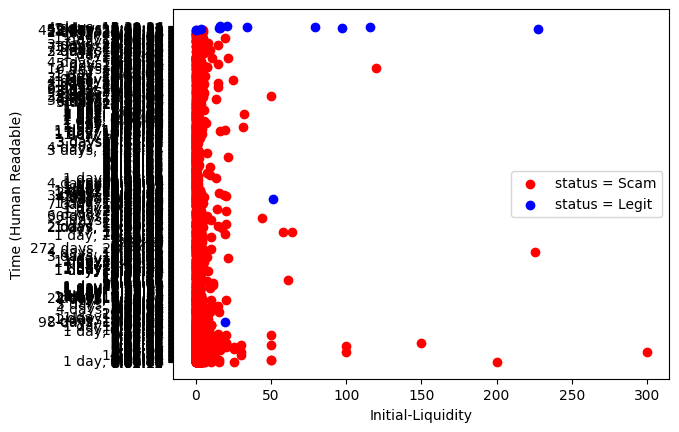

In [18]:
# Convert the time values into human readable format
df['Time_Human_Readable'] = df['Time'].apply(lambda x: str(datetime.timedelta(seconds=x)))

# Plot the data
plt.scatter(df[df['status'] == 1]['Initial-Liquidity'], df[df['status'] == 1]['Time_Human_Readable'], color='red', label='status = Scam')
plt.scatter(df[df['status'] == 0]['Initial-Liquidity'], df[df['status'] == 0]['Time_Human_Readable'], color='blue', label='status = Legit')
plt.xlabel('Initial-Liquidity')
plt.ylabel('Time (Human Readable)')
plt.legend(loc='best')
plt.show()

## Buy Tax & Sell Tax Correlation between Scam & Legit

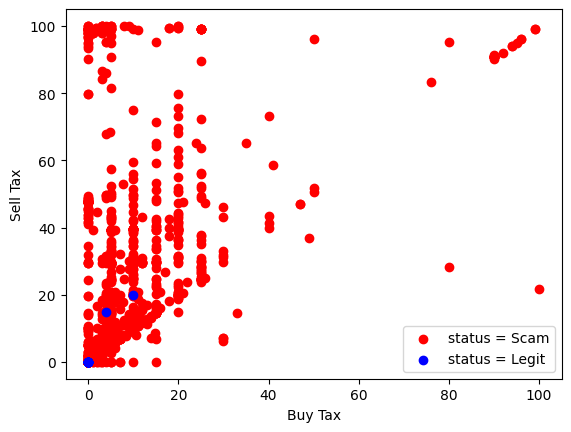

In [19]:
plt.scatter(df[df['status'] == 1]['Buy_Tax'], df[df['status'] == 1]['Sell_Tax'], color='red', label='status = Scam')
plt.scatter(df[df['status'] == 0]['Buy_Tax'], df[df['status'] == 0]['Sell_Tax'], color='blue', label='status = Legit')
plt.xlabel('Buy Tax')
plt.ylabel('Sell Tax')
plt.legend(loc='best')
plt.show()

## Creator Nonce & Holders visualization

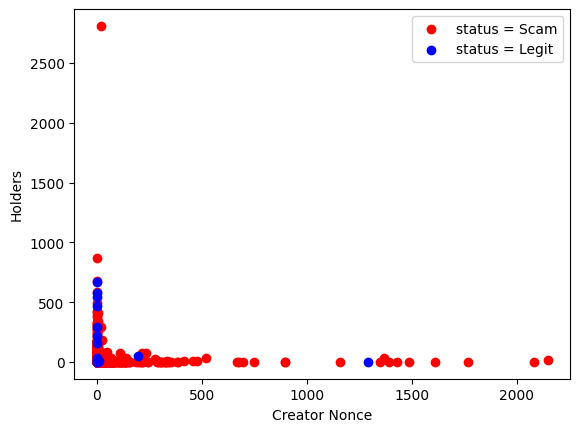

In [20]:
plt.scatter(df[df['status'] == 1]['Creator_Nonce'], df[df['status'] == 1]['Holders'], color='red', label='status = Scam')
plt.scatter(df[df['status'] == 0]['Creator_Nonce'], df[df['status'] == 0]['Holders'], color='blue', label='status = Legit')
plt.xlabel('Creator Nonce')
plt.ylabel('Holders')
plt.legend(loc='best')
plt.show()

In [21]:
X = df[["Initial-Liquidity", "Time", "Creator_Nonce", "Holders", "Honeypot", "Buy_Tax", "Sell_Tax", "Twitter", "Coingecko", "CMC", "Renounce2", "First_Wallet2"]]

y = df['status']

# Test The ML Algo

## Random Forest Algorithm

In [22]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

#Applying SMOTE

sm = SMOTE(random_state = 2, sampling_strategy="minority")
X_train, y_train = sm.fit_resample(X_train, y_train)


print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 2376
Before OverSampling, counts of label '0': 10 

Before OverSampling, counts of label '1': 2376
Before OverSampling, counts of label '0': 2376 



In [23]:


rf = RandomForestClassifier(max_depth=1000, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
#print(y_pred)


In [24]:
print("Accuracy of Random Forest Model is ",rf.score(X_test, y_test))

Accuracy of Random Forest Model is  0.9949748743718593


In [25]:
predicted = rf.predict(X_test)
print(
    f"Classification report for classifier {rf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier RandomForestClassifier(max_depth=1000, random_state=42):
              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       1.00      1.00      1.00       593

    accuracy                           0.99       597
   macro avg       0.80      0.87      0.83       597
weighted avg       1.00      0.99      1.00       597




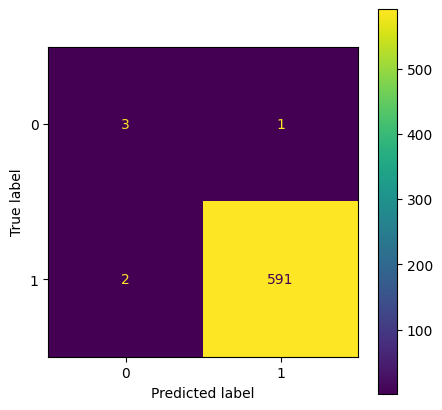

In [26]:
cm = confusion_matrix(y_test, predicted)
cmp = ConfusionMatrixDisplay(cm, display_labels=np.arange(2))
fig, ax = plt.subplots(figsize=(5,5))
cmp.plot(ax=ax)

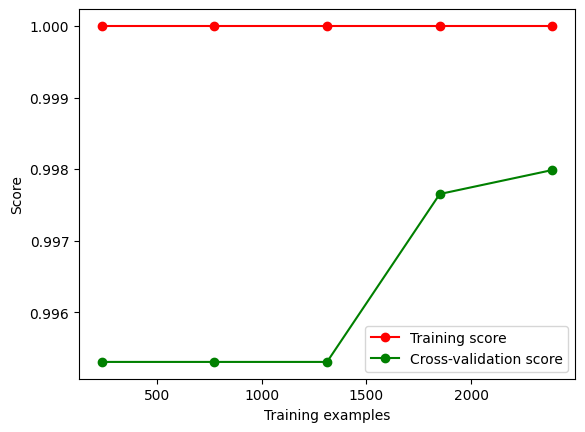

In [27]:
train_sizes, train_scores, test_scores = learning_curve(rf, X, y, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

## LOGISTIC REGRESSION

In [28]:
# start timer before and after fit into the model
#timer start
start_time = timeit.default_timer()

# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sm = SMOTE(random_state = 2)
X_train, y_train = sm.fit_resample(X_train, y_train)


# Model Building using logistic Regression
logit = LogisticRegression(random_state=42, max_iter=1000)
#logit = LogisticRegression(random_state=42, max_iter=100)
logit.fit(X_train, y_train)

y_pred_rf = logit.predict(X_test)
print(y_pred_rf)

timeitlogit = logit.fit(X_train, y_train)

#timer stop
logit_elapsed = timeit.default_timer() - start_time

[1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1
 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1
 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1
 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1
 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0
 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1
 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0
 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 

In [29]:
# Accuracy of logit model
print("Accuracy of Logistic Regression Model is ",logit.score(X_test, y_test))

Accuracy of Logistic Regression Model is  0.7604690117252931


In [30]:
predicted = logit.predict(X_test)
print(
    f"Classification report for classifier {logit}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier LogisticRegression(max_iter=1000, random_state=42):
              precision    recall  f1-score   support

           0       0.02      0.75      0.04         4
           1       1.00      0.76      0.86       593

    accuracy                           0.76       597
   macro avg       0.51      0.76      0.45       597
weighted avg       0.99      0.76      0.86       597




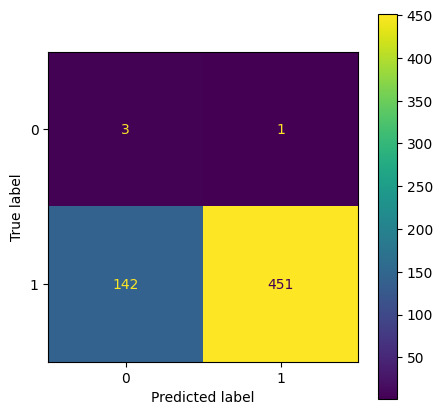

In [31]:
cm = confusion_matrix(y_test, predicted)
cmp = ConfusionMatrixDisplay(cm, display_labels=np.arange(2))
fig, ax = plt.subplots(figsize=(5,5))
cmp.plot(ax=ax)

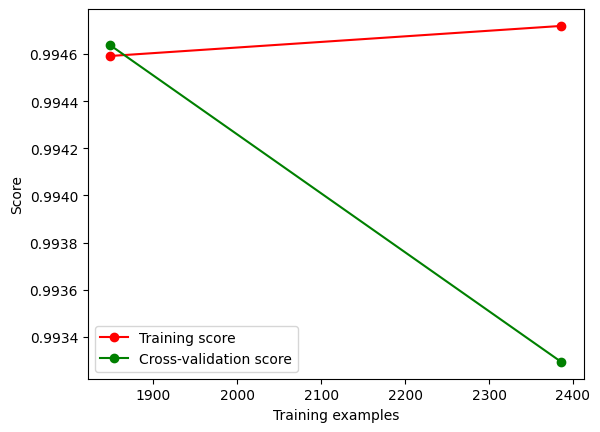

In [32]:
train_sizes, train_scores, test_scores = learning_curve(logit, X, y, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

## MLP

In [33]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sm = SMOTE(random_state = 2)
X_train, y_train = sm.fit_resample(X_train, y_train)

start_time = timeit.default_timer()

mlp = MLPClassifier(random_state=42, max_iter=300)
#mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,solver='sgd', tol=1e-4, random_state=1,learning_rate_init=.1)

mlp.fit(X_train, y_train)

y_pred_rf = mlp.predict(X_test)
print(y_pred_rf)

mlp_elapsed = timeit.default_timer() - start_time

[1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1
 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 0
 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0
 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1 0
 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0
 0 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1
 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0
 0 0 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1
 0 0 0 0 0 0 0 1 0 1 1 1 

In [34]:
print("Accuracy of MLPClassifier is ",mlp.score(X_test, y_test))

Accuracy of MLPClassifier is  0.37353433835845895


In [35]:
predicted = mlp.predict(X_test)
print(
    f"Classification report for classifier {mlp}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier MLPClassifier(max_iter=300, random_state=42):
              precision    recall  f1-score   support

           0       0.01      1.00      0.02         4
           1       1.00      0.37      0.54       593

    accuracy                           0.37       597
   macro avg       0.51      0.68      0.28       597
weighted avg       0.99      0.37      0.54       597




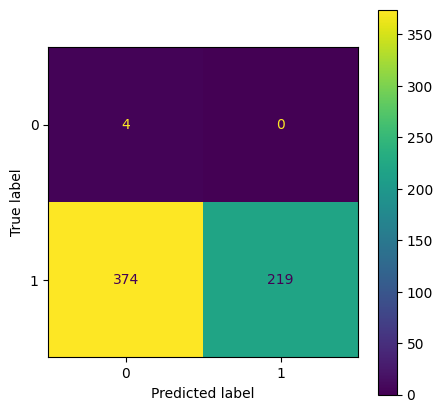

In [36]:
cm = confusion_matrix(y_test, predicted)
cmp = ConfusionMatrixDisplay(cm, display_labels=np.arange(2))
fig, ax = plt.subplots(figsize=(5,5))
cmp.plot(ax=ax)

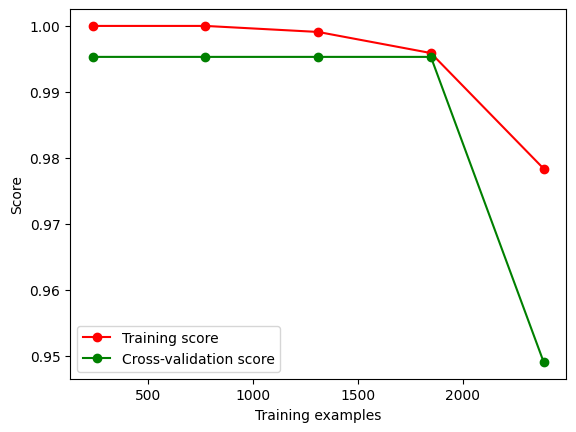

In [37]:
train_sizes, train_scores, test_scores = learning_curve(mlp, X, y, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

## Decison Tree

In [38]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sm = SMOTE(random_state = 2)
X_train, y_train = sm.fit_resample(X_train, y_train)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_rf = dt.predict(X_test)

In [39]:
print("Accuracy of Decision Tree is ",dt.score(X_test, y_test))

Accuracy of Decision Tree is  0.9849246231155779


In [40]:
predicted = dt.predict(X_test)
print(
    f"Classification report for Decision Tree classifier {dt}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for Decision Tree classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.31      1.00      0.47         4
           1       1.00      0.98      0.99       593

    accuracy                           0.98       597
   macro avg       0.65      0.99      0.73       597
weighted avg       1.00      0.98      0.99       597




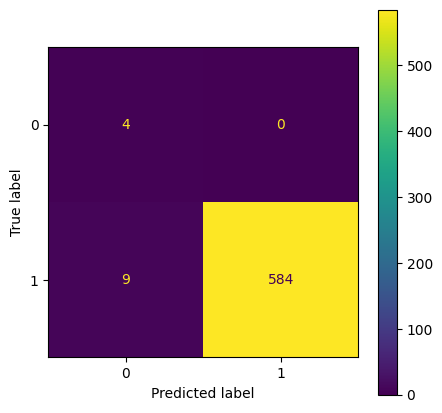

In [41]:
cm = confusion_matrix(y_test, predicted)
cmp = ConfusionMatrixDisplay(cm, display_labels=np.arange(2))
fig, ax = plt.subplots(figsize=(5,5))
cmp.plot(ax=ax)

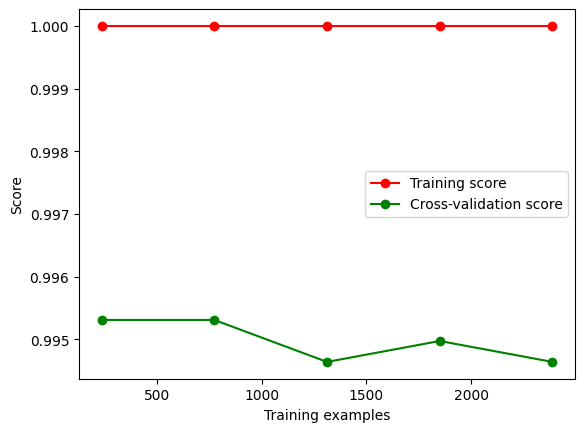

In [42]:
train_sizes, train_scores, test_scores = learning_curve(dt, X, y, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

## SVM

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sm = SMOTE(random_state = 2)
X_train, y_train = sm.fit_resample(X_train, y_train)

svm = SVC()
svm.fit(X_train, y_train)
y_pred_rf = svm.predict(X_test)

In [44]:
print("Accuracy of De is ",dt.score(X_test, y_test))

Accuracy of De is  0.9849246231155779


In [45]:
predicted = svm.predict(X_test)
print(
    f"Classification report for Decision Tree classifier {dt}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for Decision Tree classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.11      0.75      0.19         4
           1       1.00      0.96      0.98       593

    accuracy                           0.96       597
   macro avg       0.55      0.85      0.58       597
weighted avg       0.99      0.96      0.97       597




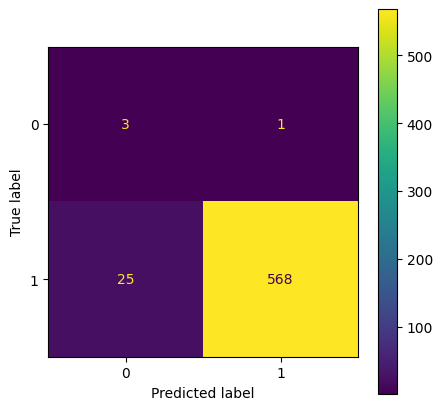

In [46]:
cm = confusion_matrix(y_test, predicted)
cmp = ConfusionMatrixDisplay(cm, display_labels=np.arange(2))
fig, ax = plt.subplots(figsize=(5,5))
cmp.plot(ax=ax)

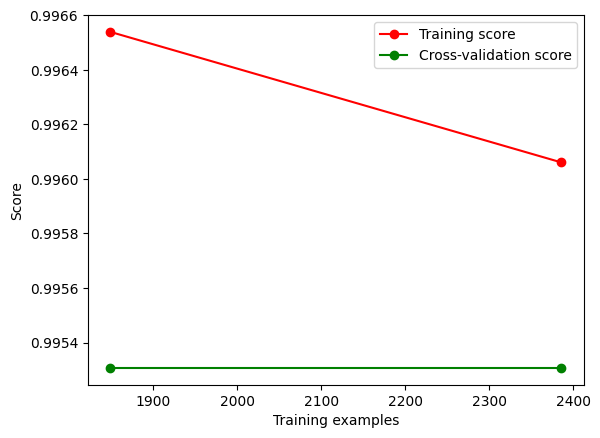

In [47]:
train_sizes, train_scores, test_scores = learning_curve(svm, X, y, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

## KKN

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sm = SMOTE(random_state = 2)
X_train, y_train = sm.fit_resample(X_train, y_train)

kkn = KNeighborsClassifier(n_neighbors=5)
kkn.fit(X_train, y_train)
y_pred_rf = kkn.predict(X_test)

In [49]:
print("Accuracy of De is ",kkn.score(X_test, y_test))

Accuracy of De is  0.9078726968174204


In [50]:
predicted = kkn.predict(X_test)
print(
    f"Classification report for Decision Tree classifier {kkn}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for Decision Tree classifier KNeighborsClassifier():
              precision    recall  f1-score   support

           0       0.05      0.75      0.10         4
           1       1.00      0.91      0.95       593

    accuracy                           0.91       597
   macro avg       0.53      0.83      0.52       597
weighted avg       0.99      0.91      0.95       597




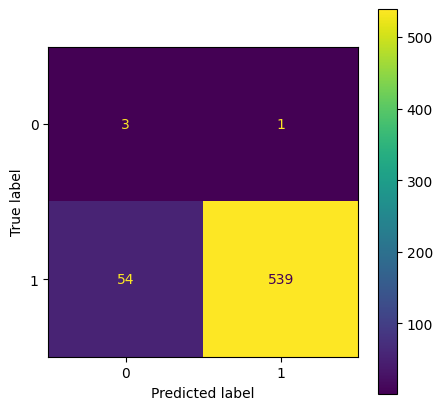

In [51]:
cm = confusion_matrix(y_test, predicted)
cmp = ConfusionMatrixDisplay(cm, display_labels=np.arange(2))
fig, ax = plt.subplots(figsize=(5,5))
cmp.plot(ax=ax)

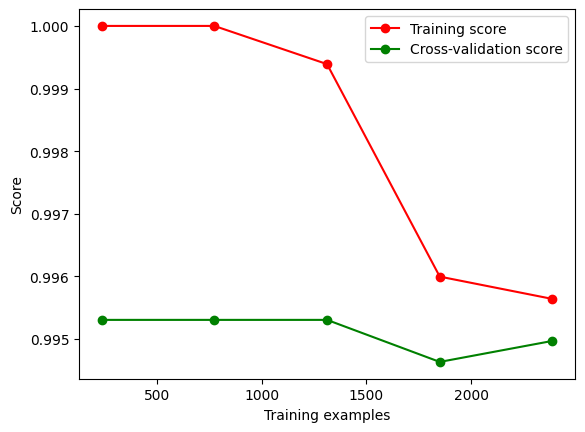

In [52]:
train_sizes, train_scores, test_scores = learning_curve(kkn, X, y, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

## Naive Bayes

In [53]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sm = SMOTE(random_state = 2)
X_train, y_train = sm.fit_resample(X_train, y_train)

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_rf = nb.predict(X_test)
print(y_pred_rf)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [54]:
print(f"Accuracy of {nb} is ",nb.score(X_test, y_test))

Accuracy of GaussianNB() is  0.9865996649916248


In [55]:
predicted = nb.predict(X_test)
print(
    f"Classification report for Decision Tree classifier {nb}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for Decision Tree classifier GaussianNB():
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.99      0.99      0.99       593

    accuracy                           0.99       597
   macro avg       0.50      0.50      0.50       597
weighted avg       0.99      0.99      0.99       597




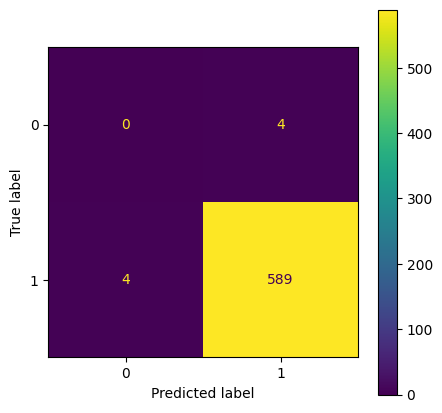

In [56]:
cm = confusion_matrix(y_test, predicted)
cmp = ConfusionMatrixDisplay(cm, display_labels=np.arange(2))
fig, ax = plt.subplots(figsize=(5,5))
cmp.plot(ax=ax)

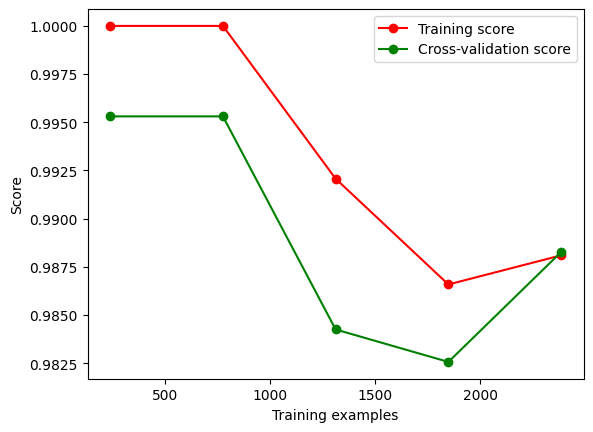

In [57]:
train_sizes, train_scores, test_scores = learning_curve(nb, X, y, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

In [58]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)

MSE:  0.0031683347460525896
